In [11]:
# imports
import numpy as np 
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/Users/mohod/Developer/OTsim/brownian_ot')
# %matplotlib inline
import analysis as ana
from brownian_ot import analysis as anb

In [12]:
# getArrayTraj 
def getArrayTraj(toFind):
    trajs=[]
    Path =  "/Users/mohod/Developer/OTsim/otsim_data/"
    folders  = os.listdir(Path)
    # print(folders)
    for id in toFind:
        for folder in folders:
            # print(folder)
            if(folder[0] != "."):
                files=""
                # try:
                files = os.listdir(Path+folder+"/data/")
                # print(Path+folder+"/data/")
                # except Exception:
                #     print("some")
                #     pass
                for file in files:
                    # print(Path+folder+"/data/")
                    filename = file.split("_")
                    # print(filename[-1])
                    uuid = int(filename[-1].split(".")[0])
                    # print(uuid)
                    if uuid == id:
                        trajs.append([Path+folder+"/data/"+file,ana.expand_trajectory(np.load(Path+folder+"/data/"+file))])
    return trajs

In [13]:
# getArrayRadius
def getArrayRadius(allTraj):
    ans = []
    sds = []
    # print(allTraj[1][1,:].shape)
    for traj in allTraj:
        # print(traj[0])
        radius, sd = ana.getRadius(traj[1])
        ans.append(radius)
        sds.append(sd)
    return ans,sds
def getArrayFrequency(allTraj):
    ans = []
    for traj in allTraj:
        ans.append(ana.getfreq(traj[1][:,0]))
    return np.abs(ans)
        

In [14]:
modes_ = [-5,-4,-3,-2,-1,1,2,3,4,5]
LCP_modeVar_ = getArrayTraj([1396063,1443911,7953901,1691108,3095563,2754058,2785636,8887351,6227950,2086283])
RCP_modeVar_ = getArrayTraj([6919532,5869568,1575031,9304164,3733357,8745830,7096516,8270385,8735907,2667818])

ratio = 50

for m in range(len(modes_)):
    # print(LCP_modeVar_[m][1].shape,RCP_modeVar_[m][1].shape)
    
    LCP_modeVar_[m][1] = LCP_modeVar_[m][1][:-1:ratio,:]
    # print(LCP_modeVar_[m][1].shape, "LCP")
    
    if m < len(modes_) - 3:
        RCP_modeVar_[m][1] = RCP_modeVar_[m][1][:-1:ratio,:]
        # print(RCP_modeVar_[m][1].shape, "RCP")


RCP_modeVar_[7][1] = RCP_modeVar_[7][1][:-1:ratio*2,:]
RCP_modeVar_[8][1] = RCP_modeVar_[8][1][:-1:ratio*2,:]
RCP_modeVar_[9][1] = RCP_modeVar_[9][1][:-1:ratio*2,:]

for m in range(len(modes_)):
    print(LCP_modeVar_[m][1].shape, "LCP")
    print(RCP_modeVar_[m][1].shape, "RCP")
    # plt.plot(LCP_modeVar_[m][1][:,0])
    

(10000, 12) LCP
(10000, 12) RCP
(10000, 12) LCP
(10000, 12) RCP
(10000, 12) LCP
(10000, 12) RCP
(10000, 12) LCP
(10000, 12) RCP
(10000, 12) LCP
(10000, 12) RCP
(10000, 12) LCP
(20000, 12) RCP
(10000, 12) LCP
(20000, 12) RCP
(10000, 12) LCP
(10000, 12) RCP
(10000, 12) LCP
(10000, 12) RCP
(10000, 12) LCP
(10000, 12) RCP


In [15]:
LCP_dorb= []
RCP_dorb= []

for i in range(len(modes_)):
    LCP_dorb.append(ana.deorbit_particle_axes(LCP_modeVar_[i][1]))
    RCP_dorb.append(ana.deorbit_particle_axes(RCP_modeVar_[i][1]))

# LCP_dorb = np.array(LCP_dorb)
# print(LCP_dorb.shape)
# RCP_dorb = np.array(RCP_dorb)
# print(RCP_dorb.shape)

In [16]:
LCP_axisCor= []
RCP_axisCor= []

# temp = anb.calc_axis_autocorr(LCP_modeVar_[0][1], max_steps=20000)

for i in range(len(modes_)):
    maxStep = int(len(LCP_dorb[i][:,0])*0.1)
    LCP_axisCor.append(np.array(anb.calc_axis_autocorr(LCP_dorb[i], max_steps=maxStep)))
    RCP_axisCor.append(np.array(anb.calc_axis_autocorr(RCP_dorb[i], max_steps=maxStep)))

LCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L-5/data/LCP_0.03_1396063.npy
RCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L-5/data/RCP_0.03_6919532.npy


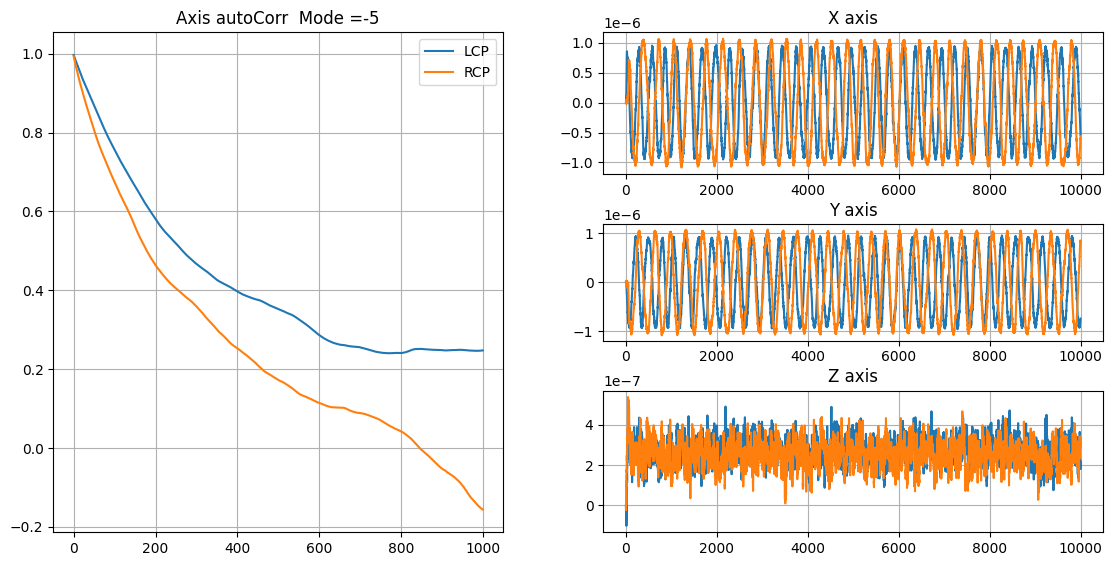

LCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L-4/data/LCP_0.03_1443911.npy
RCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L-4/data/RCP_0.03_5869568.npy


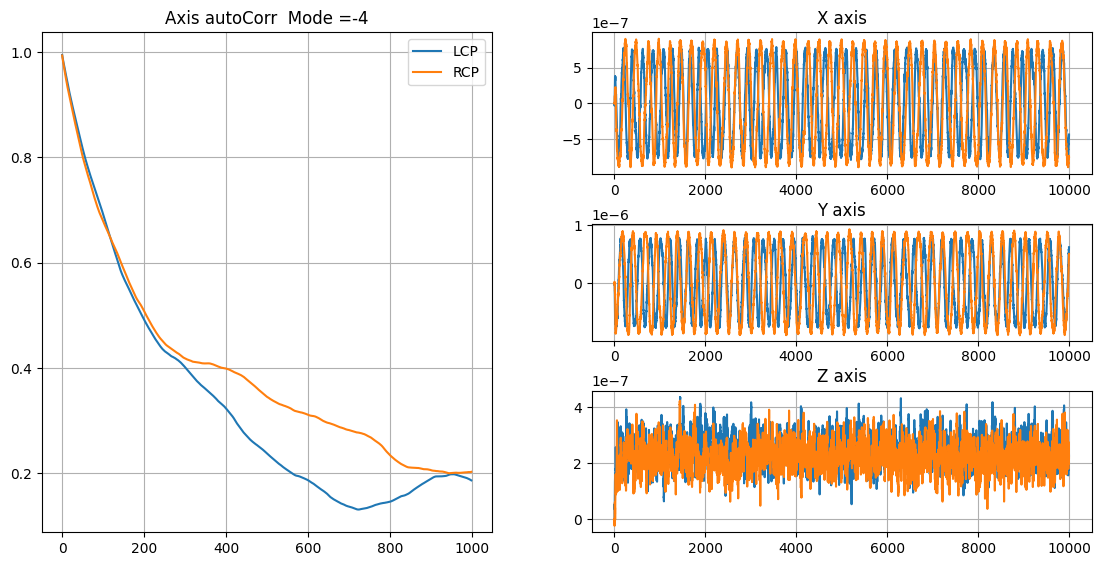

LCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L-3/data/LCP_0.03_7953901.npy
RCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L-3/data/RCP_0.03_1575031.npy


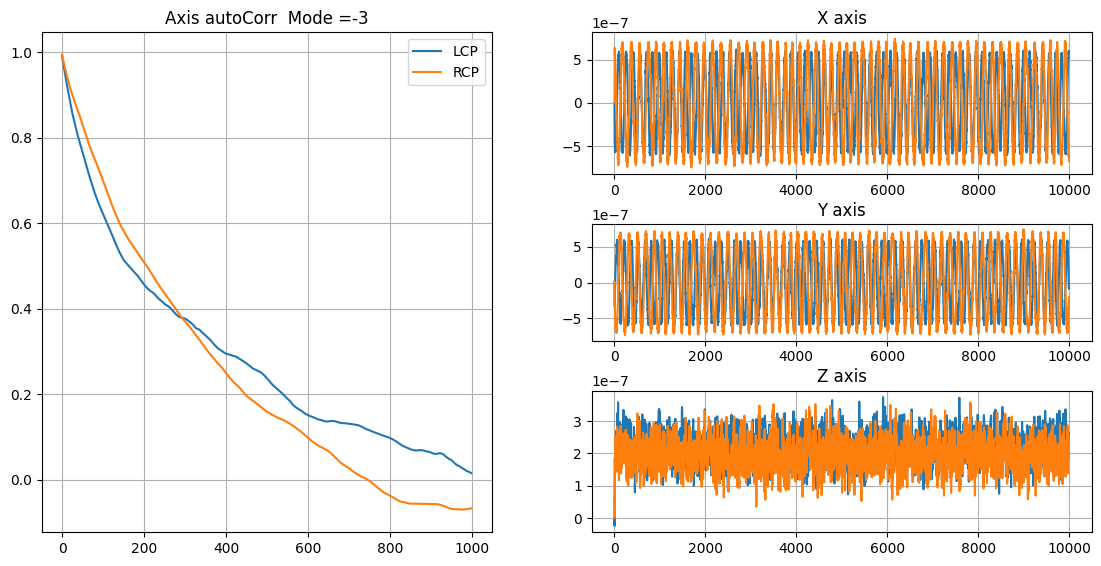

LCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L-2/data/LCP_0.03_1691108.npy
RCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L-2/data/RCP_0.03_9304164.npy


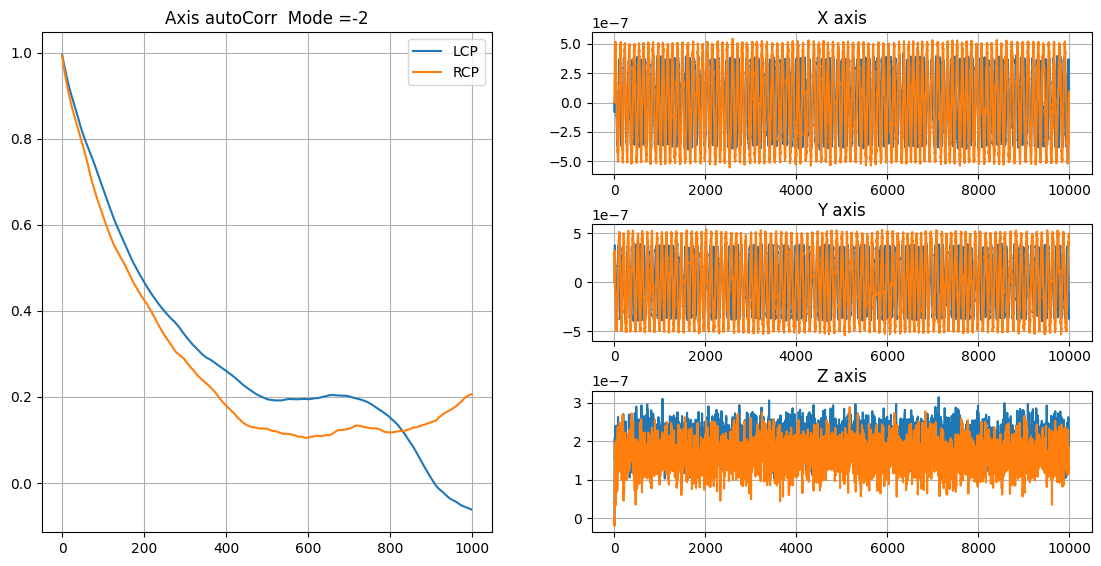

LCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L-1/data/LCP_0.03_3095563.npy
RCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L-1/data/RCP_0.03_3733357.npy


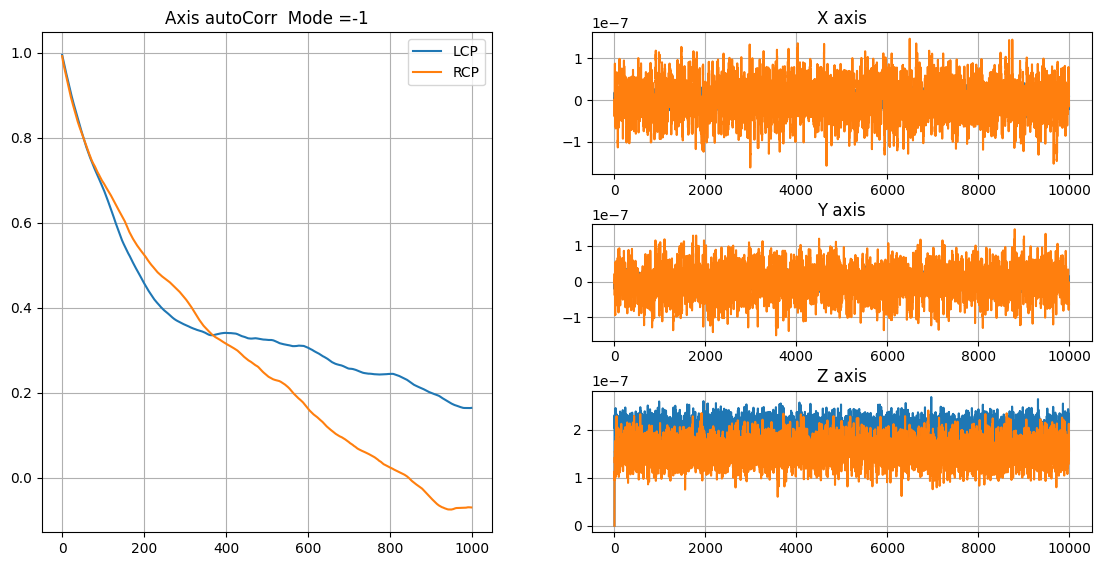

LCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L1/data/LCP_0.03_2754058.npy
RCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L1/data/RCP_0.03_8745830.npy


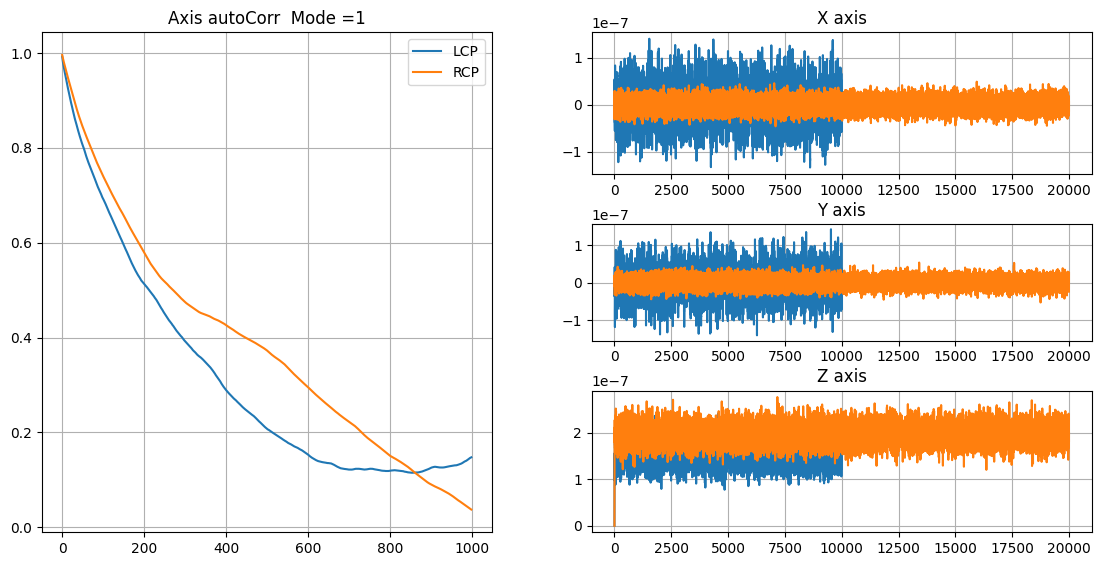

LCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L2/data/LCP_0.03_2785636.npy
RCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L2/data/RCP_0.03_7096516.npy


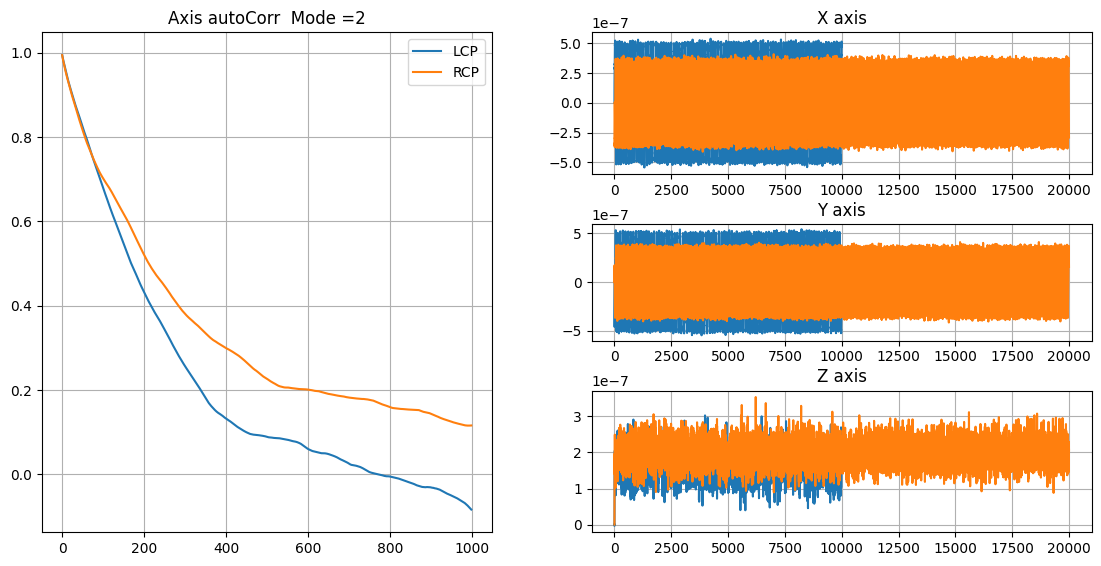

LCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L3/data/LCP_0.03_8887351.npy
RCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L3/data/RCP_0.03_8270385.npy


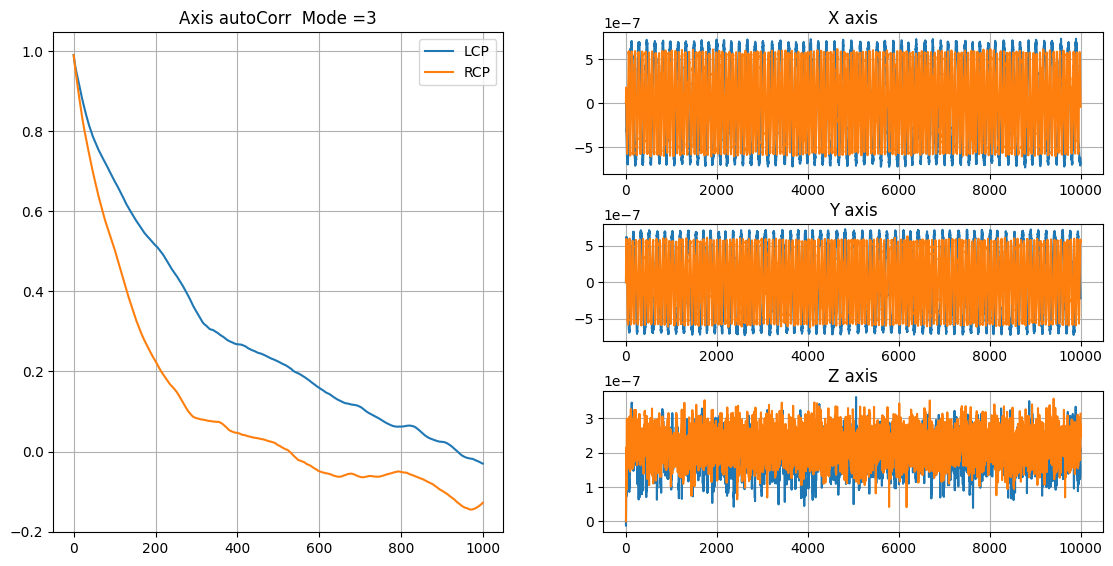

LCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L4/data/LCP_0.03_6227950.npy
RCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L4/data/RCP_0.03_8735907.npy


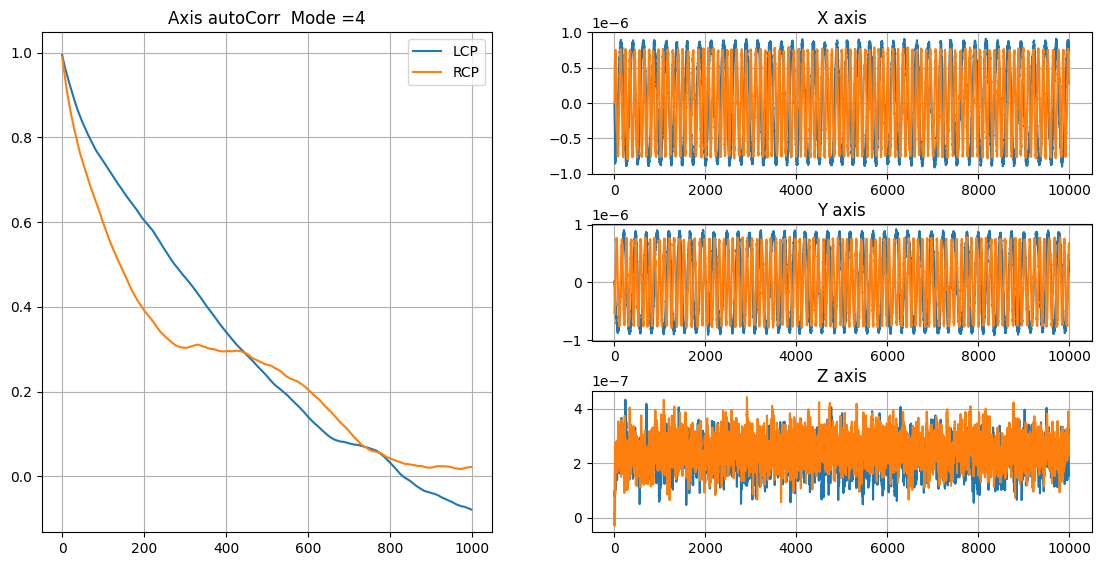

LCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L5/data/LCP_0.03_2086283.npy
RCP Traj: /Users/mohod/Developer/OTsim/otsim_data/L5/data/RCP_0.03_2667818.npy


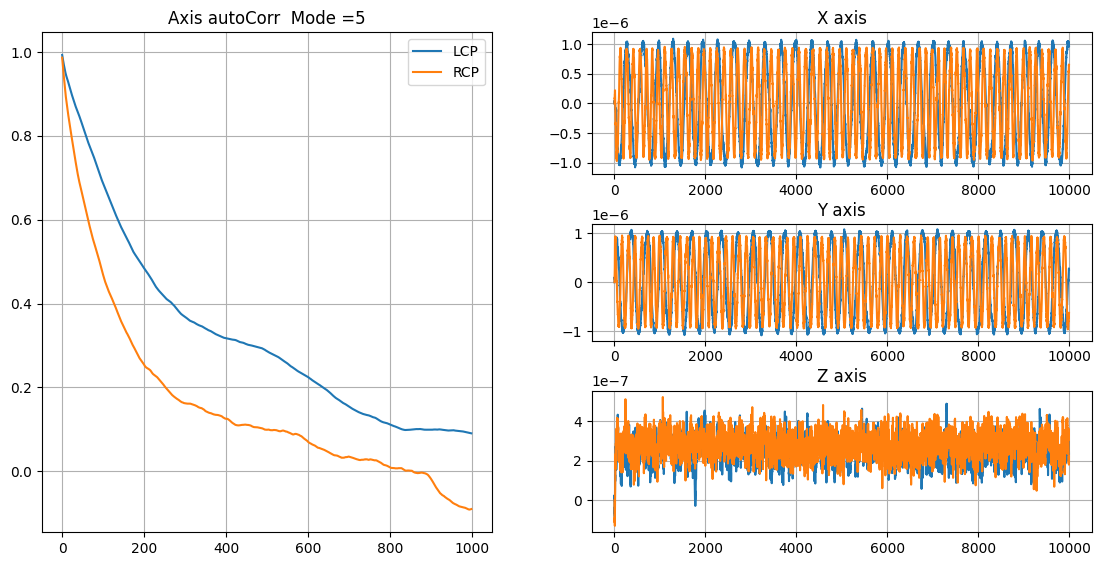

In [17]:
count=0
for i in range(len(modes_)):
    # plt.figure()
    # plt.title(str(modes_[count]))
    # plt.plot(LCP_axisCor[i][0,:],label="LCP")
    # plt.plot(RCP_axisCor[i][0,:],label="RCP")
    # plt.legend()
    # plt.grid()
    print("LCP Traj:", LCP_modeVar_[i][0])
    print("RCP Traj:", RCP_modeVar_[i][0])
    
    fig = plt.figure(figsize=(10,5))
    
    ax1 = fig.add_axes([0, 0, 0.45, 1]) 
    ax1.grid()
    ax1.set_title("Axis autoCorr  Mode ="+ str(modes_[i]))
    ax1.plot(LCP_axisCor[i][0,:],label="LCP")  
    ax1.plot(RCP_axisCor[i][0,:],label="RCP")  
    ax1.legend()
    
    ax2 = fig.add_axes([0.55, 2/3 +0.05, 0.5, 1/3 -0.05])  
    ax2.grid()
    ax2.set_title("X axis")
    ax2.plot(LCP_modeVar_[i][1][:,0],label="LCP") 
    ax2.plot(RCP_modeVar_[i][1][:,0],label="RCP") 
    
    ax3 = fig.add_axes([0.55, 1/3 +0.05, 0.5, 1/3 -0.1])  
    ax3.grid()
    ax3.set_title("Y axis")
    ax3.plot(LCP_modeVar_[i][1][:,1],label="LCP") 
    ax3.plot(RCP_modeVar_[i][1][:,1],label="RCP") 
    
    ax4 = fig.add_axes([0.55, 0, 0.5, 1/3 -0.05])  
    ax4.grid()
    ax4.set_title("Z axis")
    ax4.plot(LCP_modeVar_[i][1][:,2],label="LCP") 
    ax4.plot(RCP_modeVar_[i][1][:,2],label="RCP") 
    plt.show()
    

    count+=1